In [20]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [21]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [22]:
# Save the input and target variables
print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [23]:
# Normalise the target data (this will make clearer training curves)
import numpy as np
targets = (targets - np.mean(targets, axis = 0))/np.std(targets, axis = 0)

In [24]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, targets, test_size = 0.1)

#### Train a feedforward neural network model

In [25]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'sigmoid'))
  return model

model = get_model()

In [26]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [27]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [28]:
# Train the model, with some of the data reserved for validation
history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 1.2035 - mae: 0.9489 - val_loss: 1.3108 - val_mae: 0.9961
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.1571 - mae: 0.9311 - val_loss: 1.1778 - val_mae: 0.9401
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.9671 - mae: 0.8565 - val_loss: 1.0027 - val_mae: 0.8496
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8359 - mae: 0.8005 - val_loss: 0.8921 - val_mae: 0.8074
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7901 - mae: 0.7751 - val_loss: 0.9060 - val_mae: 0.8011
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7703 - mae: 0.7636 - val_loss: 0.8525 - val_mae: 0.7889
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7443 - mae: 0.7541 - val_loss: 0.8807 - val_mae: 0.7962
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7075 - 

In [29]:
# Evaluate the model on the test set
mse, mae = model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8522 - mae: 0.7947


#### Plot the learning curves

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

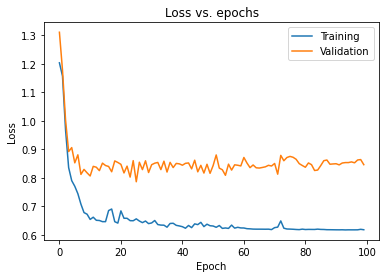

In [31]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [32]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [33]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer = regularizers.l2(wd), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(rate = 0.3),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        BatchNormalization(),
        Dropout(rate = 0.3),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        BatchNormalization(),
        Dropout(rate = 0.3),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        BatchNormalization(),
        Dropout(rate = 0.3),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        BatchNormalization(),
        Dropout(rate = 0.3),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        BatchNormalization(),
        Dense(1)
    ])
    return model

In [34]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)

In [35]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [36]:
# Train the model, with some of the data reserved for validation
history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 0s 23ms/step - loss: 2.1096 - mae: 1.1377 - val_loss: 1.0857 - val_mae: 0.8744
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.7124 - mae: 1.0369 - val_loss: 1.0852 - val_mae: 0.8734
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.4910 - mae: 0.9729 - val_loss: 1.0855 - val_mae: 0.8698
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.2949 - mae: 0.9216 - val_loss: 1.0839 - val_mae: 0.8733
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1.2979 - mae: 0.9095 - val_loss: 1.0829 - val_mae: 0.8697
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1521 - mae: 0.8472 - val_loss: 1.0840 - val_mae: 0.8687
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 1.2401 - mae: 0.8893 - val_loss: 1.0881 - val_mae: 0.8640
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 1.1101 - 

In [37]:
# Evaluate the model on the test set
mse, mae = model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.6298 - mae: 0.5950


#### Plot the learning curves

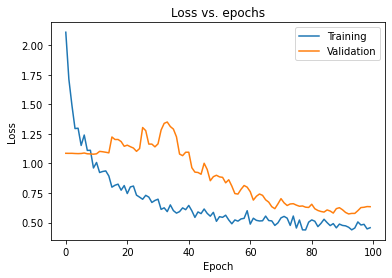

In [38]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [48]:
# Write a custom callback
# NOTE: We have similar variants of functions in the Callback class (that we have subclassed below) which are used for "testing" and "prediction" as well.
# Just swap out "train" by "test/predict" in the function names below.
from tensorflow.keras.callbacks import Callback

class custom_callback(Callback):
  
  def on_train_begin(self, logs = None):
    print("Started training...")
  
  def on_epoch_begin(self, epoch, logs = None):
    print(f"Started epoch {epoch}")

  def on_epoch_end(self, epoch, logs = None):
    print(f"Ending epoch {epoch}")

  def on_train_end(self, logs = None):
    print("Completed training...")

In [41]:
# Re-build the model
model = get_regularised_model(0.00001, 0.3)


In [43]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


#### Train the model with the callback

In [44]:
# Train the model, with some of the data reserved for validation
model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2, callbacks = [custom_callback()])


Started training...
Started epoch 0
Epoch 1/100
10/10 [==============================] - 0s 24ms/step - loss: 2.7081 - mae: 1.2785 - val_loss: 1.0881 - val_mae: 0.8653
Started epoch 1
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.7856 - mae: 1.0802 - val_loss: 1.0991 - val_mae: 0.8609
Started epoch 2
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 1.8461 - mae: 1.0806 - val_loss: 1.1005 - val_mae: 0.8609
Started epoch 3
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.4565 - mae: 0.9565 - val_loss: 1.1124 - val_mae: 0.8617
Started epoch 4
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1.2861 - mae: 0.9099 - val_loss: 1.1204 - val_mae: 0.8628
Started epoch 5
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 1.2164 - mae: 0.8818 - val_loss: 1.1392 - val_mae: 0.8638
Started epoch 6
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 1.1921 -

In [46]:
# Evaluate the model
mse, mae = model.evaluate(X_test, Y_test)


2/2 [==============================] - 0s 1ms/step - loss: 0.5661 - mae: 0.5784


In [47]:
# Make predictions with the model
model.predict(X_test)


array([[-0.21359059],
       [-0.37852833],
       [-0.6889181 ],
       [ 0.19268236],
       [-0.561269  ],
       [ 1.1348855 ],
       [-0.66781706],
       [-0.75023115],
       [-0.72446084],
       [-0.2705185 ],
       [ 1.4603679 ],
       [-0.1758013 ],
       [-0.27853367],
       [-0.4441857 ],
       [-0.49556136],
       [-0.7749245 ],
       [-0.28965756],
       [-0.4024949 ],
       [-0.8388956 ],
       [-0.10903638],
       [-0.8049418 ],
       [-0.9796426 ],
       [-1.1524911 ],
       [-0.5452242 ],
       [-0.6801303 ],
       [ 0.8821415 ],
       [-0.9494424 ],
       [ 0.17138396],
       [ 0.434059  ],
       [ 1.5936584 ],
       [ 1.5624483 ],
       [ 1.4493196 ],
       [-0.99638   ],
       [-0.84442973],
       [-0.40349644],
       [-1.073225  ],
       [-1.2474778 ],
       [ 0.4843802 ],
       [-1.2136961 ],
       [ 0.15052311],
       [-0.55214804],
       [ 1.0470282 ],
       [-1.0961592 ],
       [-0.55047524],
       [-0.72370577]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [50]:
import tensorflow

In [54]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
unreg_history = unregularised_model.fit(X_train, Y_train, epochs = 100, validation_split = 0.15, batch_size = 64, verbose = False, callbacks = [tensorflow.keras.callbacks.EarlyStopping()])

In [55]:
# Evaluate the model on the test set
unreg_mse, unreg_mae = unregularised_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.8774 - mae: 0.8260


In [57]:
# Re-train the regularised model
regularised_model = get_regularised_model(0.00001, 0.3)
regularised_model.compile(optimizer = 'adam', loss = 'mae')
reg_history = regularised_model.fit(X_train, Y_train, epochs = 100, validation_split = 0.15, batch_size = 64, verbose = False, callbacks = [tensorflow.keras.callbacks.EarlyStopping()])


In [59]:
# Evaluate the model on the test set
reg_mse, reg_mae = unregularised_model.evaluate(X_test, Y_test)


2/2 [==============================] - 0s 2ms/step - loss: 0.8774 - mae: 0.8260


#### Plot the learning curves

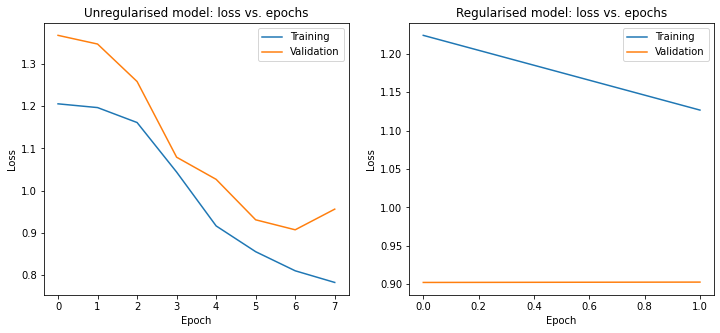

In [60]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()